In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msg  # 缺失值情况进行可视化
import sklearn
import warnings
warnings.filterwarnings("ignore") # 忽略警告
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline 

In [2]:
# 载入数据
df = pd.read_csv("./data/internet_service_churn.csv")

## 特征释意
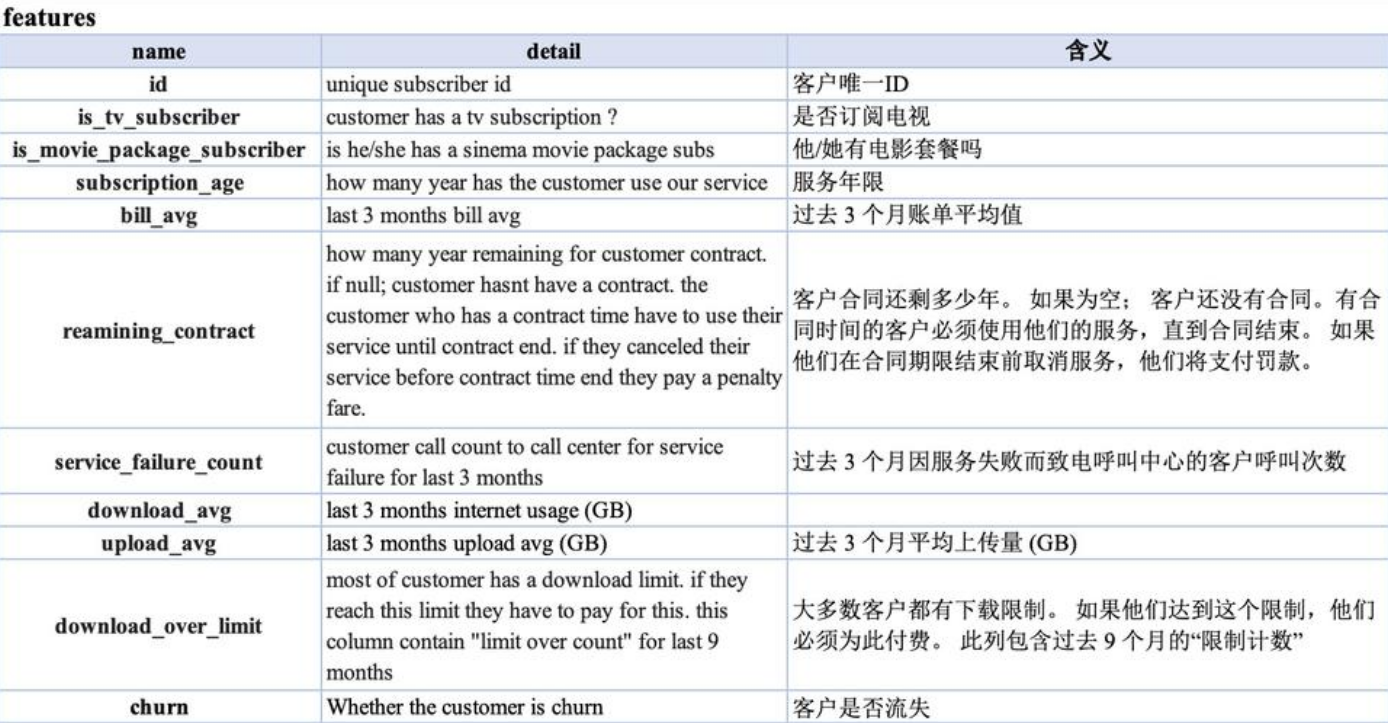

背景

互联网提供商之间存在着激烈的竞争。如果供应商想增加收入，他们需要更多的订阅者，但保持现有客户比拥有新客户更重要。所以商家想知道哪些客户可能会取消服务，即客户流失。如果知道谁会流失，也许商家可以通过促销来抓住他们。  

内容

##### 是否流失：1代表客户流失; 0代表客户没有流失  ； 换言之：1代表离开的客户，0代表现在还保留的客户
该数据集收集了使用视频服务的客户相关数据，并在客户流失与否时进行标记。  
基于该数据集，本项目将会创建一个决策树模型来预测客户是否流失。
我们为使用互联网服务的客户收集数据，并在客户是否流失的情况下对数据进行标记。您可以使用这个数据集来创建一个流失模型，并预测客户流失概率。

In [3]:
# 重命名列名 其中"平均账单金额","投诉次数","平均下载量","平均上传量","限制次数"特征的时间维度均为过去3个月
df.columns = ["客户ID","订购电视套餐用户","订购电影套餐用户","客户年限","平均账单金额","合同剩余年限","投诉次数","平均下载量","平均上传量","限制次数","是否流失"]

In [4]:
# 查看数据集
df

,客户ID,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [5]:
# 查看前十条数据
df.head(10)

,客户ID,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,NaN,1,0.0,0.0,0,1
8,94,0,0,8.54,0,NaN,0,0.0,0.0,0,1
9,112,0,0,8.33,0,NaN,0,0.0,0.0,0,1


In [6]:
# 查看数据集行列数
df.shape

(72274, 11)

In [7]:
# 查看数据集类型
df.dtypes

客户ID          int64
订购电视套餐用户      int64
订购电影套餐用户      int64
客户年限        float64
平均账单金额        int64
合同剩余年限      float64
投诉次数          int64
平均下载量       float64
平均上传量       float64
限制次数          int64
是否流失          int64
dtype: object

In [8]:
# 查看所有特征
df_cols=df.columns.tolist()
for i in df.columns.tolist():
    print(i)

客户ID
订购电视套餐用户
订购电影套餐用户
客户年限
平均账单金额
合同剩余年限
投诉次数
平均下载量
平均上传量
限制次数
是否流失


In [9]:
# 查看数据集描述并将表格转置
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
客户ID,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
订购电视套餐用户,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
订购电影套餐用户,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
客户年限,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
平均账单金额,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
合同剩余年限,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
投诉次数,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
平均下载量,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
平均上传量,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
限制次数,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


In [10]:
# 查看数据集中的空值
df.isnull().sum()

客户ID            0
订购电视套餐用户        0
订购电影套餐用户        0
客户年限            0
平均账单金额          0
合同剩余年限      21572
投诉次数            0
平均下载量         381
平均上传量         381
限制次数            0
是否流失            0
dtype: int64

In [11]:
# 查看数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   客户ID      72274 non-null  int64  
 1   订购电视套餐用户  72274 non-null  int64  
 2   订购电影套餐用户  72274 non-null  int64  
 3   客户年限      72274 non-null  float64
 4   平均账单金额    72274 non-null  int64  
 5   合同剩余年限    50702 non-null  float64
 6   投诉次数      72274 non-null  int64  
 7   平均下载量     71893 non-null  float64
 8   平均上传量     71893 non-null  float64
 9   限制次数      72274 non-null  int64  
 10  是否流失      72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [12]:
df

,客户ID,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


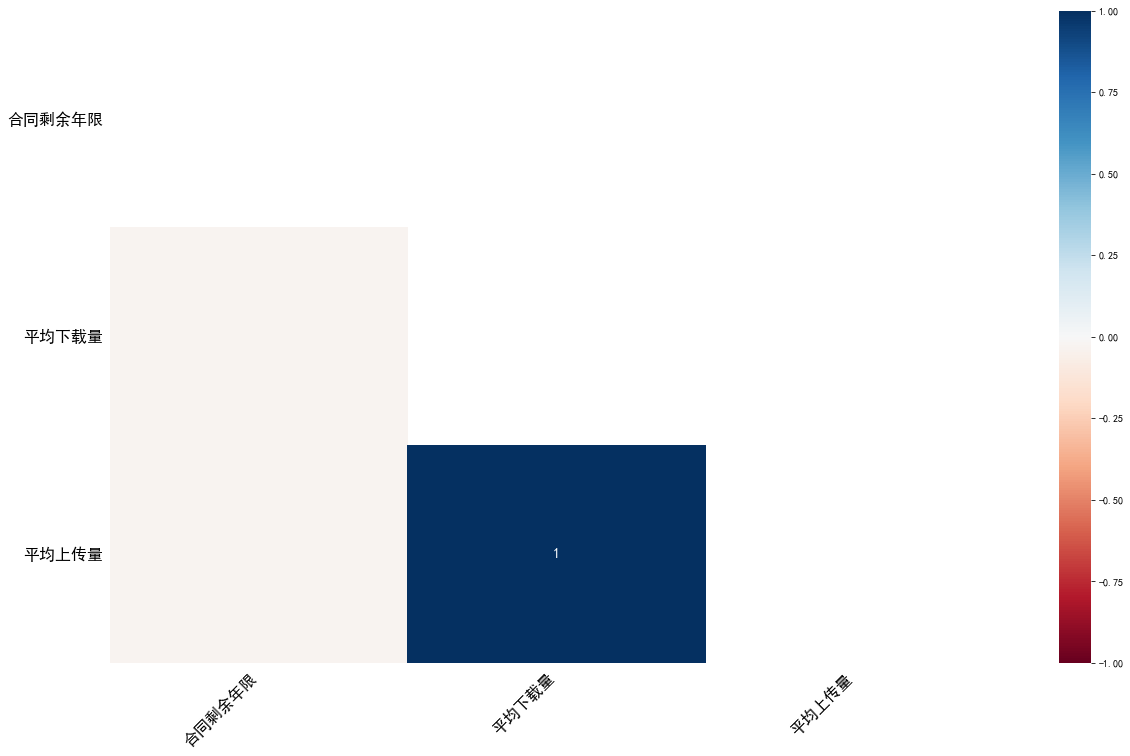

In [13]:
# 缺失数据可视化展示
msg.heatmap(df)
plt.show()

图形展示出合同剩余年限的缺失值比较多

In [14]:
# 将id这列删除，id意义不大
df.drop('客户ID',axis='columns', inplace=True)

In [15]:
df

,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [16]:
# 获取"订购电视套餐用户","订购电影套餐用户"两列的1的数量
list_sub1=df[["订购电视套餐用户","订购电影套餐用户"]].sum()
y = list(list_sub1.values)
y

[58922, 24185]

In [17]:
y = [58922, 24185]

In [18]:
print ("有多少不是订购电视套餐用户 :" , df[df["订购电视套餐用户"]==0].count()["是否流失"])
print ("有多少不是订购电影套餐用户 :" , df[df["订购电影套餐用户"]==0].count()["是否流失"])

有多少不是订购电视套餐用户 : 13352
有多少不是订购电影套餐用户 : 48089


In [19]:
from pyecharts import options as opts
from pyecharts.charts import Bar
# 条形图
c = (
    Bar()
    .add_xaxis(["订购电视套餐用户","订购电影套餐用户"])
    .add_yaxis("人数", y)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="人数进行对比"),
        yaxis_opts=opts.AxisOpts(name="人数"),
        xaxis_opts=opts.AxisOpts(name="类别")))
c.render_notebook()

Text(0.5, 1.0, '人数进行对比')

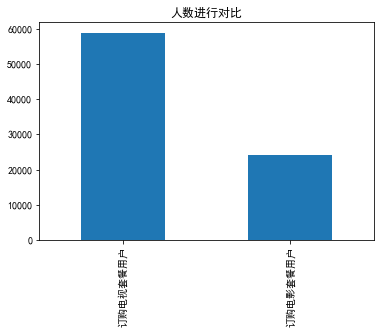

In [20]:
list_sub1.plot.bar()  # 用list_sub1作为x轴标签作柱状图
plt.title("人数进行对比")

将订购电视套餐用户和订购电影套餐用户的数量进行对比，可以发现订购电视套餐用户的数量高于订购电影套餐用户

In [21]:
[df[df["订购电视套餐用户"]==1].count(),df[df["订购电影套餐用户"]==1].count()]

[订购电视套餐用户    58922
 订购电影套餐用户    58922
 客户年限        58922
 平均账单金额      58922
 合同剩余年限      45312
 投诉次数        58922
 平均下载量       58609
 平均上传量       58609
 限制次数        58922
 是否流失        58922
 dtype: int64,
 订购电视套餐用户    24185
 订购电影套餐用户    24185
 客户年限        24185
 平均账单金额      24185
 合同剩余年限      20222
 投诉次数        24185
 平均下载量       24017
 平均上传量       24017
 限制次数        24185
 是否流失        24185
 dtype: int64]

In [22]:
[(df["订购电视套餐用户"]==1).sum(), (df["订购电影套餐用户"]==1).sum()]

[58922, 24185]

In [23]:
[(df["订购电视套餐用户"]==0).sum(),(df["订购电影套餐用户"]==0).sum()]

[13352, 48089]

In [24]:
from pyecharts.charts import Bar

c = (
    Bar()
    .add_xaxis(["用户是否订购电视套餐","用户是否订购电影套餐"])
    .add_yaxis("已订购", [58922, 24185], stack="stack1")
    .add_yaxis("未订购", [13352, 48089], stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="用户是否订购电视或电影套餐？"))
)
c.render_notebook()

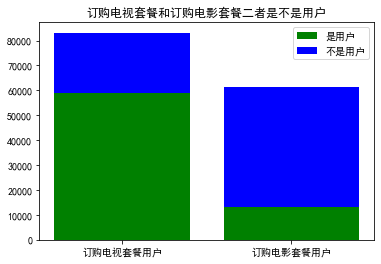

In [35]:
# 创建数据
x = ["订购电视套餐用户","订购电影套餐用户"]   # x轴标签
y1 = [df[df["订购电视套餐用户"]==1].count()["订购电视套餐用户"],df[df["订购电视套餐用户"]==0].count()["订购电视套餐用户"]]
y2 = [df[df["订购电影套餐用户"]==1].count()["订购电影套餐用户"],df[df["订购电影套餐用户"]==0].count()["订购电影套餐用户"]]
  
plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='b')
plt.legend(["是用户","不是用户"])
plt.title("订购电视套餐和订购电影套餐二者是不是用户")
plt.show()

在订购电视套餐中是用户的数量高于不是用户的，而在订购电影套餐用户不是用户的数量高于是用户的
但总体数量上订购电视套餐人数多于订购电影套餐用户

In [25]:

v2 = [
    list(df[df["是否流失"]==0]["客户年限"].values),
    list(df[df["是否流失"]==1]["客户年限"].values),
]

In [26]:
v2

[[11.95,
  11.94,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.93,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.92,
  11.91,
  11.91,
  11.91,
  11.91,
  11.8,
  11.8,
  11.8,
  11.79,
  11.76,
  11.74,
  11.72,
  11.72,
  11.7,
  11.7,
  11.69,
  11.68,
  11.66,
  11.65,
  11.65,
  11.64,
  11.64,
  11.64,
  11.62,
  11.62,
  11.61,
  11.6,
  11.6,
  11.59,
  11.59,
  11.49,
  11.47,
  11.39,

In [28]:
from pyecharts.charts import Boxplot

v2 = [
    list(df[df["是否流失"]==0]["客户年限"].values),
    list(df[df["是否流失"]==1]["客户年限"].values),
]
c = Boxplot()
c.add_xaxis(["保留客户", "流失客户"])
c.add_yaxis("客户年限", c.prepare_data(v2))
c.set_global_opts(title_opts=opts.TitleOpts(title="用户是否流失与客户年限的关系"))
# c.render("用户是否流失与客户年限的关系.html")
c.render_notebook()

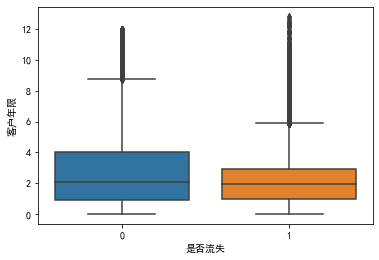

In [29]:
sns.boxplot(x="是否流失",y="客户年限",data=df)
plt.show() 

保留客户的年限平均数为2左右，则流失客户为2以下，而且流失客户中出现部分异常数据

In [30]:
df["订购电视套餐用户"].count()

72274

In [31]:
 list(df[df["是否流失"]==0][df["订购电视套餐用户"]==1]["平均账单金额"].values),

([25,
  32,
  10,
  18,
  22,
  65,
  24,
  45,
  16,
  23,
  33,
  24,
  16,
  20,
  37,
  10,
  21,
  40,
  24,
  10,
  15,
  30,
  25,
  59,
  25,
  15,
  21,
  24,
  34,
  17,
  21,
  15,
  15,
  48,
  22,
  19,
  10,
  32,
  33,
  24,
  31,
  24,
  24,
  16,
  24,
  21,
  19,
  21,
  22,
  17,
  29,
  20,
  22,
  25,
  22,
  71,
  22,
  17,
  20,
  65,
  21,
  10,
  19,
  22,
  20,
  10,
  22,
  25,
  57,
  20,
  25,
  3,
  26,
  21,
  20,
  19,
  21,
  25,
  22,
  21,
  10,
  15,
  12,
  79,
  20,
  21,
  21,
  15,
  20,
  10,
  10,
  21,
  15,
  21,
  24,
  21,
  10,
  56,
  37,
  10,
  26,
  20,
  22,
  15,
  18,
  10,
  15,
  22,
  25,
  20,
  63,
  25,
  10,
  24,
  24,
  28,
  28,
  22,
  22,
  10,
  13,
  25,
  22,
  10,
  12,
  24,
  10,
  9,
  18,
  32,
  25,
  24,
  15,
  24,
  20,
  12,
  20,
  20,
  12,
  10,
  21,
  18,
  22,
  22,
  20,
  20,
  20,
  15,
  14,
  21,
  12,
  12,
  12,
  20,
  22,
  25,
  19,
  13,
  17,
  15,
  10,
  24,
  25,
  21,
  19,
  14,
  17,


In [32]:
df

,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [33]:
df.groupby('是否流失')['订购电视套餐用户'].sum()

是否流失
0    30838
1    28084
Name: 订购电视套餐用户, dtype: int64

In [34]:
df[df["是否流失"]==0]["平均账单金额"].values

array([25, 32, 10, ...,  0,  0,  0], dtype=int64)

In [35]:
from pyecharts.charts import Boxplot

v1 = [
    df[df["是否流失"]==0][df["订购电视套餐用户"]==0]["平均账单金额"].values/1,
    df[df["是否流失"]==1][df["订购电视套餐用户"]==0]["平均账单金额"].values/1,
]
v2 = [
    df[df["是否流失"]==0][df["订购电影套餐用户"]==0]["平均账单金额"].values/1,
    df[df["是否流失"]==1][df["订购电影套餐用户"]==0]["平均账单金额"].values/1,
]
c = Boxplot()
c.add_xaxis(["保留客户", "流失客户"])
c.add_yaxis("订购电视套餐用户", c.prepare_data(v1))
c.add_yaxis("订购电影套餐用户", c.prepare_data(v2))
c.set_global_opts(title_opts=opts.TitleOpts(title="不同用户的消费金额"))
# c.render("是不是电视用户下是否流失与平均账单金额关系.html")
c.render_notebook()

# 更改到此

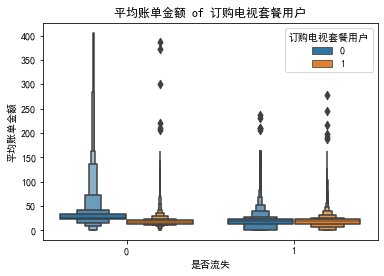

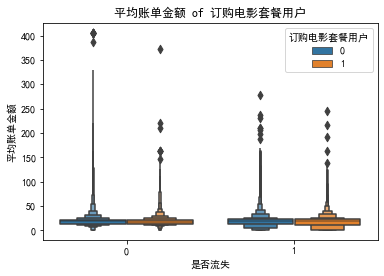

In [48]:
subscribers=["订购电视套餐用户","订购电影套餐用户"]
for i in subscribers:
    sns.boxenplot(x="是否流失",y="平均账单金额",data=df,hue=i)
    plt.title("平均账单金额 of "+ i)
    plt.show()

在第一个图中：现保留下来的客户中，不是订购电视套餐用户的平均账单金额均值大于是订购电视套餐用户，而且是订购电视套餐用户存在异常值；在流失的客户中，不是订购电视套餐用户与是订购电视套餐用户的平均账单金额均值差不多，且均存在异常值

在第二个图中：现保留下来的客户中，不是订购电影套餐用户的平均账单金额均值与是订购电影套餐用户差不多，且是订购电影套餐用户存在明显的异常值；在流失的客户中，不是订购电影套餐用户的平均账单金额均值与是订购电影套餐用户差不多，均存在异常值

In [49]:
list(df["客户年限"].values)

[11.95,
 8.22,
 8.91,
 6.87,
 6.39,
 11.94,
 8.96,
 5.48,
 8.54,
 8.33,
 8.44,
 11.93,
 6.64,
 5.53,
 6.97,
 11.93,
 11.93,
 6.45,
 6.81,
 11.93,
 5.95,
 11.93,
 8.53,
 11.93,
 8.57,
 11.93,
 5.21,
 5.93,
 7.02,
 10.93,
 6.03,
 9.22,
 5.62,
 6.6,
 11.12,
 11.88,
 5.44,
 5.62,
 11.93,
 5.62,
 6.35,
 6.64,
 5.3,
 5.62,
 11.93,
 5.53,
 10.26,
 5.7,
 7.79,
 8.13,
 10.8,
 11.93,
 11.93,
 11.93,
 11.93,
 5.7,
 9.18,
 9.75,
 11.93,
 5.62,
 6.79,
 5.1,
 7.61,
 11.93,
 5.28,
 7.64,
 6.97,
 6.92,
 11.93,
 11.93,
 11.93,
 5.62,
 11.93,
 9.21,
 5.72,
 5.62,
 6.12,
 11.93,
 10.08,
 6.81,
 8.19,
 8.04,
 6.23,
 11.93,
 11.93,
 11.93,
 11.93,
 5.99,
 11.93,
 8.38,
 8.25,
 11.09,
 11.93,
 7.29,
 5.34,
 11.93,
 8.72,
 5.52,
 11.93,
 7.81,
 12.8,
 11.93,
 6.29,
 8.75,
 5.62,
 5.62,
 6.42,
 6.35,
 6.24,
 5.14,
 7.22,
 9.38,
 7.82,
 11.93,
 9.59,
 8.27,
 10.55,
 5.64,
 8.36,
 6.54,
 7.09,
 11.93,
 6.83,
 9.23,
 5.62,
 5.62,
 11.93,
 10.24,
 11.93,
 9.96,
 5.47,
 11.93,
 11.93,
 8.45,
 7.04,
 11.93,
 11.93,

In [99]:
df["客户年限"].value_counts

<bound method IndexOpsMixin.value_counts of 0        11.95
2         8.91
5        11.94
6         8.96
10        8.44
         ...  
72269     0.09
72270     0.06
72271     0.02
72272     0.01
72273     0.01
Name: 客户年限, Length: 50375, dtype: float64>

In [36]:
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(list(df["客户年限"].values))
    .add_yaxis("客户", [df["客户年限"].sum()], category_gap=0, color=Faker.rand_color())
    .set_global_opts(title_opts=opts.TitleOpts(title="客户年限"))
#     .render("客户年限.html")
)
c.render_notebook()

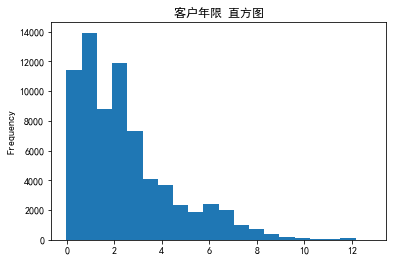

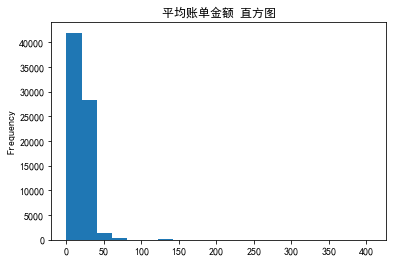

In [52]:
df.loc[:,["客户年限","平均账单金额"]]
list2=list(df.loc[:,["客户年限","平均账单金额"]].columns)
for i in list2:
    df[i].plot.hist(bins=20,title= str(i)+ " 直方图")
    plt.show()

上图可知，用户的年限主要集中在4年以内，第二个图知平均账单主要在50个以内

In [53]:
# 查看相关系数
correlation=df.corr()
correlation

,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
订购电视套餐用户,1.000000,0.337435,0.087276,-0.076245,0.178814,-0.016041,0.131650,0.065791,-0.103546,-0.327582
订购电影套餐用户,0.337435,1.000000,0.131986,-0.022534,0.319179,0.013345,0.160590,0.093251,-0.026352,-0.307167
客户年限,0.087276,0.131986,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277,0.023694,-0.122441
平均账单金额,-0.076245,-0.022534,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236,-0.232738,-0.021058
合同剩余年限,0.178814,0.319179,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651,-0.050014,-0.625450
投诉次数,-0.016041,0.013345,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699,0.004947,0.021575
平均下载量,0.131650,0.160590,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436,-0.114322,-0.298063
平均上传量,0.065791,0.093251,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000,-0.069192,-0.162690
限制次数,-0.103546,-0.026352,0.023694,-0.232738,-0.050014,0.004947,-0.114322,-0.069192,1.000000,0.158318
是否流失,-0.327582,-0.307167,-0.122441,-0.021058,-0.625450,0.021575,-0.298063,-0.162690,0.158318,1.000000


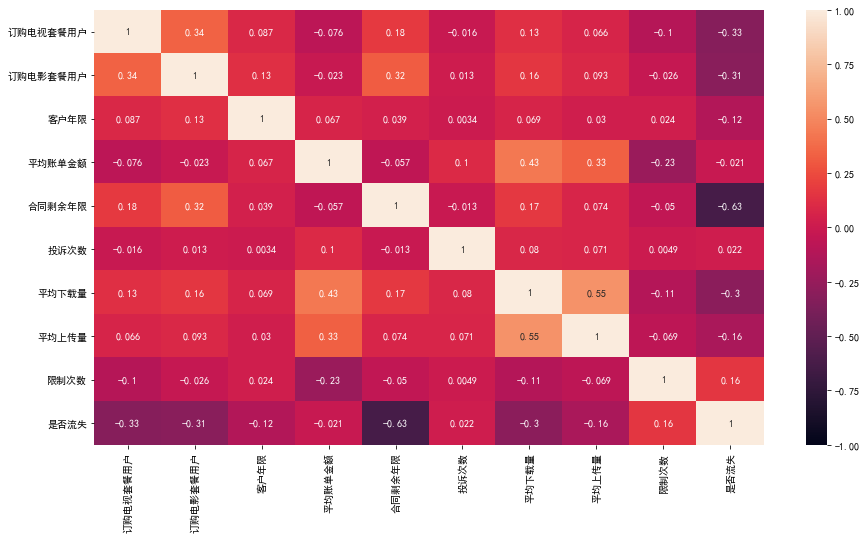

In [54]:
sns.set_palette("Accent") # 更改默认调色板
plt.figure(figsize=(15,8))  # 画布大小
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True) # 指定数值范围并在热力图的每个单元上显示数值
plt.show()

展示出各个类别之间的相关系数

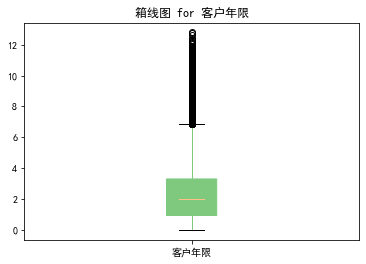

[0.93, 1.98, 3.3, 12.8]


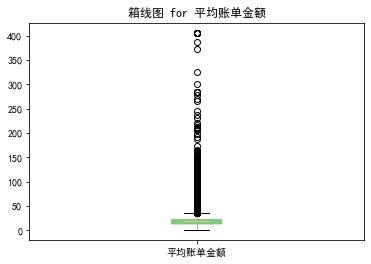

[13.0, 19.0, 22.0, 406.0]


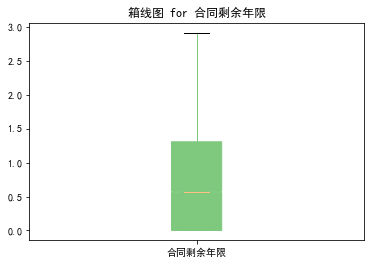

[0.0, 0.57, 1.31, 2.92]


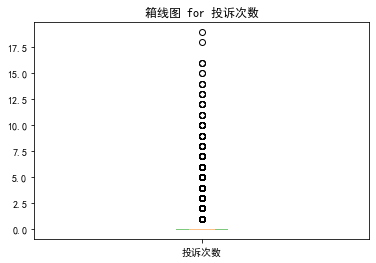

[0.0, 0.0, 0.0, 19.0]


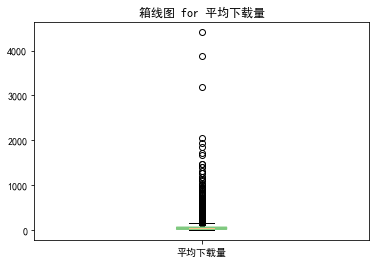

[6.7, 27.8, 60.5, 4415.2]


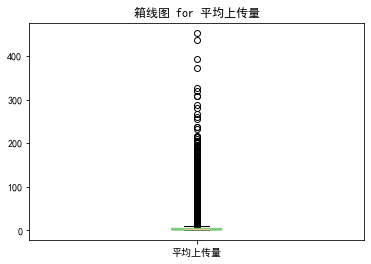

[0.5, 2.1, 4.8, 453.3]


In [55]:
df2=df.loc[:,["客户年限","平均账单金额","合同剩余年限","投诉次数","平均下载量","平均上传量"]]
for i in df2.columns.tolist():
    df[i].plot.box(patch_artist = True,notch ='True')
    plt.title("箱线图 for "+ str(i))
    plt.show()
    print([df[i].quantile(0.25),df[i].quantile(0.5),df[i].quantile(0.75),df[i].quantile(1)])

由图可知，客户年限的数据比较集中，平均数在2左右，平均账单存在异常值，平均数在25左右，合同年限中位数在0.6左右，投诉次数的数据比较分散，
平均下载量有部分异常值，平均上传量有部分异常值

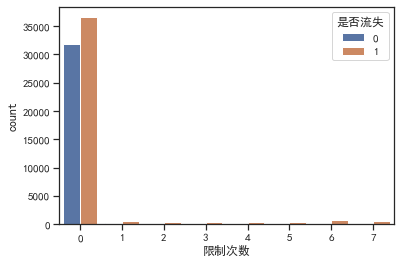

In [56]:
rc = {'font.sans-serif': 'SimHei', # 显示中文和符号
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc) # 设置样式
sns.countplot(x="限制次数",hue="是否流失",data=df)
plt.show()

流失的客户限制次数多于没有流失的，且流失的客户数量大于没有流失的

In [39]:
df=df.dropna()  # 去除空值
# 不同类别的点会以不同的颜色显现出来
# sns.pairplot(df,hue="是否流失") # 对于”是否流失”的不同可能性分开进行展示“
# plt.show() 

## 特征选择
### 单变量选择

In [40]:
from sklearn.feature_selection import SelectKBest # 筛选出 k 个评分最高的变量 
from sklearn.feature_selection import chi2  # 卡方检验

In [41]:
df["客户年限"]=[abs(i) for i in df["客户年限"]]
y=df["是否流失"]
x=df.loc[:,["订购电视套餐用户","订购电影套餐用户","客户年限","平均账单金额","合同剩余年限","投诉次数","平均下载量","平均上传量","限制次数"]]
bestcolumns=SelectKBest(score_func=chi2,k="all") # 用于打分的机制函数是卡方检验，选择的最佳特征个数是全部
fit=bestcolumns.fit(x,y)  # 拟合训练
df_scores=pd.DataFrame(fit.scores_) # 特征分数
dfcolumns=pd.DataFrame(x.columns)
featureScores=pd.concat([dfcolumns,df_scores],axis=1)
featureScores.columns=["特征值","特征分数"]
featureScores

,特征值,特征分数
0,订购电视套餐用户,507.085993
1,订购电影套餐用户,2445.939808
2,客户年限,4120.899299
3,平均账单金额,244.619709
4,合同剩余年限,13332.292243
5,投诉次数,93.186913
6,平均下载量,241358.417934
7,平均上传量,17153.479551
8,限制次数,2853.602522


In [42]:
X_kbest = bestcolumns.fit_transform(x, y)
print('原始特征数量:', x.shape[1])
print('减少的特征数量:', X_kbest.shape[1])

原始特征数量: 9
减少的特征数量: 9


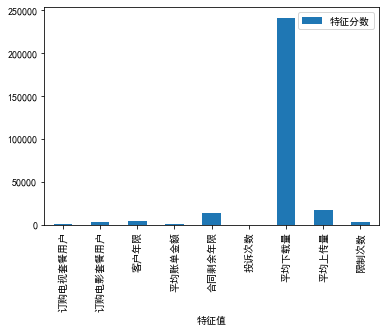

In [43]:
featureScores.plot.bar(x="特征值",y="特征分数") 
plt.show()

平均下载量的特征分数远高于其他类别

## 基于信息增益的特征选择过滤方法

In [44]:
from sklearn.feature_selection import mutual_info_classif
important_features = mutual_info_classif(x,y)  # 用于估计离散目标变量的互信息，用于衡量变量之间的依存关系
feat_importances = pd.Series(important_features,df.columns[0:len(df.columns)-1])  # 取完所有列
feat_importances

订购电视套餐用户    0.051642
订购电影套餐用户    0.040056
客户年限        0.063904
平均账单金额      0.059240
合同剩余年限      0.436012
投诉次数        0.000000
平均下载量       0.125004
平均上传量       0.120654
限制次数        0.009741
dtype: float64

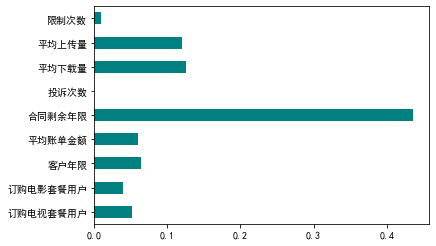

In [45]:
feat_importances.plot.barh(color="teal")
plt.show()

合同剩余年限的互信息最大

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  # 标准化
from sklearn.model_selection import train_test_split # 划分数据集
# from sklearn import tree  
from sklearn.ensemble import RandomForestClassifier # 随机森林分类器
from sklearn.metrics import accuracy_score  # 计算准确率

In [47]:
# 标准化特征向量
X2 = StandardScaler().fit_transform(x)

In [48]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 0)

In [49]:
# 训练模型
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
y_pred = clf.predict(x_test)  # 对训练集进行预测
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
print(accuracy_score(y_test,y_pred))
rf = accuracy_score(y_test,y_pred)

0.9518024456090202


<AxesSubplot:>

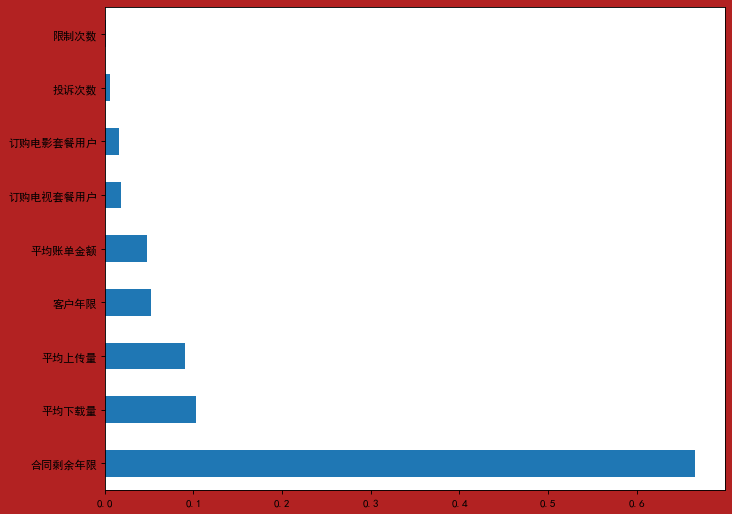

In [52]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='firebrick', edgecolor='pink')
feat_importances = pd.Series(clf.feature_importances_, index= x.columns)   # feature_importances_变量重要性指标
feat_importances.nlargest(10).plot(kind='barh')     # 返回按列顺序排列的前10行

得出的特征的重要度中合同剩余年限的特征的重要度最大

In [53]:
df.reset_index()

,index,订购电视套餐用户,订购电影套餐用户,客户年限,平均账单金额,合同剩余年限,投诉次数,平均下载量,平均上传量,限制次数,是否流失
0,0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
2,5,1,1,11.94,32,1.38,0,69.4,4.0,0,0
3,6,0,0,8.96,18,0.00,0,21.3,2.0,0,1
4,10,1,1,8.44,17,0.00,0,9.9,1.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
50370,72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
50371,72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
50372,72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
50373,72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [54]:
from sklearn.tree import DecisionTreeClassifier  # 决策树分类器
df2=df.loc[:,["客户年限","平均账单金额","合同剩余年限","平均下载量","平均上传量","是否流失"]]
df2=df2.reset_index()  # 重置索引值
df2.head(10)

,index,客户年限,平均账单金额,合同剩余年限,平均下载量,平均上传量,是否流失
0,0,11.95,25,0.14,8.4,2.3,0
1,2,8.91,16,0.00,13.7,0.9,1
2,5,11.94,32,1.38,69.4,4.0,0
3,6,8.96,18,0.00,21.3,2.0,1
4,10,8.44,17,0.00,9.9,1.1,1
5,11,11.93,10,1.28,10.6,0.6,0
6,14,6.97,23,0.28,0.0,0.0,1
7,15,11.93,18,1.80,1.0,0.0,0
8,16,11.93,22,0.01,10.6,2.4,0
9,19,11.93,65,0.21,116.8,12.1,0


In [55]:
# a=df2.loc[:,["客户年限","平均账单金额","合同剩余年限","平均下载量","平均上传量"]] 此方法第二次运行下面某些代码时会报错显示维度不一样
a=df2[["客户年限","平均账单金额","合同剩余年限","平均下载量","平均上传量"]]
y=df2["是否流失"]
# 划分数据集
a_train, a_test, y_train, y_test = train_test_split(a, y, random_state = 50, test_size = 0.25)

In [56]:
a

,客户年限,平均账单金额,合同剩余年限,平均下载量,平均上传量
0,11.95,25,0.14,8.4,2.3
1,8.91,16,0.00,13.7,0.9
2,11.94,32,1.38,69.4,4.0
3,8.96,18,0.00,21.3,2.0
4,8.44,17,0.00,9.9,1.1
...,...,...,...,...,...
50370,0.09,0,1.25,0.0,0.0
50371,0.06,1,1.63,0.8,0.0
50372,0.02,0,2.19,1.5,0.2
50373,0.01,0,0.72,0.0,0.0


In [57]:
clf = DecisionTreeClassifier(criterion = 'entropy')  # 实例化   用信息熵作为评价准则

In [58]:
# 训练决策树分类器
clf.fit(a_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
y_pred=clf.predict(a_train)
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [60]:
clf.predict(a_train).reshape(-1, 1).shape  # 将数据全部转化为一列
clf.predict(a_test).reshape(-1, 1).shape
print('在训练数据上的准确率: ', accuracy_score(y_true=y_train, y_pred=clf.predict(a_train)))
print('在测试数据上的准确率: ', accuracy_score(y_true=y_test, y_pred=clf.predict(a_test)))

在训练数据上的准确率:  1.0
在测试数据上的准确率:  0.9240908369064634


In [61]:
dt = accuracy_score(y_true=y_test, y_pred=clf.predict(a_test))  # 测试集上的准确率

## KNN

In [62]:
X = df[['订购电视套餐用户', '订购电影套餐用户', '客户年限', '平均账单金额', '合同剩余年限', '投诉次数', '平均下载量','平均上传量', '限制次数']]
y = df[['是否流失']]

In [63]:
from sklearn.preprocessing import scale
X_scale = scale(X)  # 数据进行标准化
y = y.values

In [64]:
# 划分数据集，测试集数量25%
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.25,random_state=888)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier() # 实例化
model_KNN.fit(X_train,y_train) # 拟合
pre_KNN = model_KNN.predict(X_test) # 预测测试集结果

In [66]:
pre_KNN=pd.DataFrame(pre_KNN,columns=["是否流失预测结果"]) # 转化为DataFrame形式
pre_KNN.head() # 预览前五行

,是否流失预测结果
0,0
1,1
2,1
3,0
4,0


In [67]:
pd.DataFrame(pre_KNN.value_counts(),columns=["人数"]) # 预测结果数据分布

,人数
是否流失预测结果,
0,8054
1,4540


array([[<AxesSubplot:title={'center':'是否流失预测结果'}>]], dtype=object)

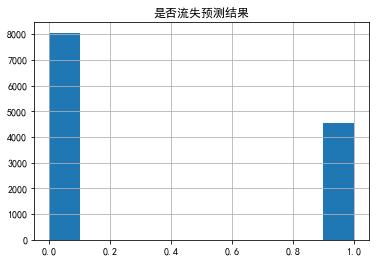

In [68]:
pre_KNN.hist() # 绘制直方图查看分布

顾客是否流失数量对比，由图所知留下来的顾客多

In [69]:
print(accuracy_score(y_test,pre_KNN)) # 准确率
knn = accuracy_score(y_test,pre_KNN)

0.9052723519136097


## 比较三种算法的预测结果

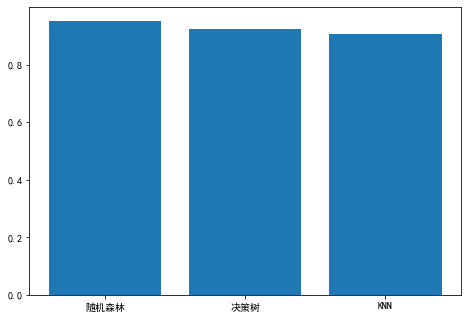

In [70]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
fig = plt.figure()   # 设置画布
ax = fig.add_axes([0,0,1,1])  # 为图形添加轴
la = ['随机森林','决策树', 'KNN']    # x轴标签
nu = [rf, dt, knn]  # y轴数值
ax.bar(la,nu)
plt.show()

条形图显示，基于同种类型的数据划分出同样的数据集，随机森林算法的预测能力优于决策树算法和KNN算法

In [71]:
from pyecharts.charts import Bar

c = (
    Bar()
    .add_xaxis(["随机森林", "决策树", "KNN"])
    .add_yaxis("算法", [rf, dt, knn])
    .set_global_opts(title_opts=opts.TitleOpts(title="不同算法的预测值比较"))
)
c.render_notebook()

条形图显示，基于同种类型的数据划分出同样的数据集，随机森林算法的预测能力优于决策树算法和KNN算法